In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from PIL import Image
from io import BytesIO
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

plt.style.use('classic')
%matplotlib inline

In [19]:
# read excel file
df = pd.read_excel('C:/Users/acc_a/OneDrive/PhOLED.xlsx', sheetname='Sheet2')

df = df[list(df.columns)[1:]]
print(df.shape)

#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0]

#drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

# copy original data
dfc = df.copy()
dfc.head()

(166, 32)
(165, 32)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL,efficiency
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0,8.0


In [20]:
rs = 2

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(random_state=rs)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=4, shuffle=True, random_state=rs)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.55660482  0.7114293   0.42606843  0.37361347]
mean R2 score:  0.516929007688 

RMSE mean:  8.08832893649 

R-squared test:  0.704689264975
RMSE:  8.55006195893


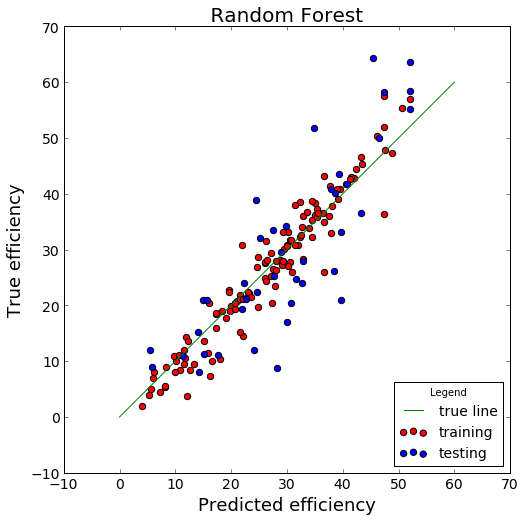

In [22]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [23]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)

regressor = RandomForestRegressor(random_state=rs)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.55660482  0.7114293   0.42606843  0.37361347]
mean R2 score:  0.516929007688 

RMSE mean:  8.08832893649 

R-squared test:  0.506005999216
RMSE:  10.3819371429


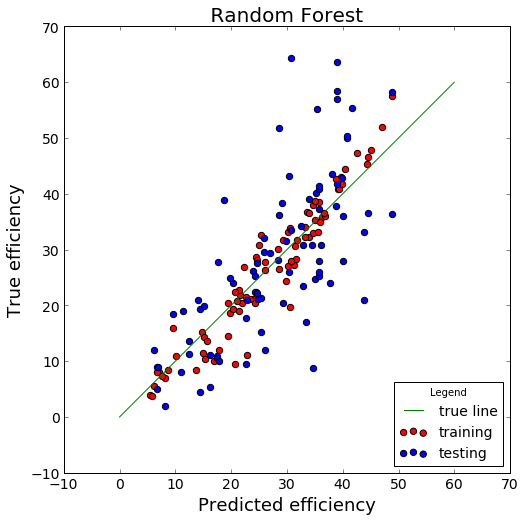

In [24]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [25]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=rs)

regressor = RandomForestRegressor(random_state=rs)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.55660482  0.7114293   0.42606843  0.37361347]
mean R2 score:  0.516929007688 

RMSE mean:  8.08832893649 

R-squared test:  0.154258088962
RMSE:  13.2027272315


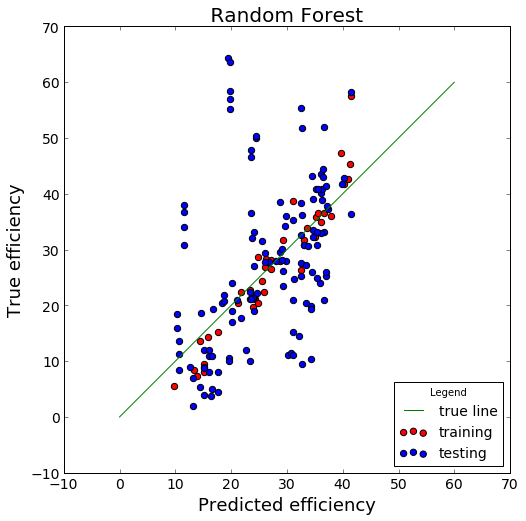

In [26]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [27]:
from xgboost import XGBRegressor

dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)

regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.64998293  0.68599443  0.51921265  0.37852491]
mean R2 score:  0.558428727884 

RMSE mean:  8.57423555625 

R-squared test:  0.649982925042
RMSE:  9.30838333989


In [28]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)

regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.64998293  0.68599443  0.51921265  0.37852491]
mean R2 score:  0.558428727884 

RMSE mean:  8.57423555625 

R-squared test:  0.334050142556
RMSE:  12.0541980574


In [29]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=rs)

regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.64998293  0.68599443  0.51921265  0.37852491]
mean R2 score:  0.558428727884 

RMSE mean:  8.57423555625 

R-squared test:  0.0545073272077
RMSE:  13.9596268114


In [35]:
from sklearn.ensemble import AdaBoostRegressor

dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.640697001141
RMSE:  9.43105039696


In [36]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.480728352472
RMSE:  10.6442450202


In [37]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=rs)

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.0542242955043
RMSE:  13.9617160509


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.691534256173
RMSE:  8.73842403559


In [39]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.550773002495
RMSE:  9.90034849123


In [40]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=rs)

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.174355428862
RMSE:  13.0449160719


In [41]:
from sklearn.neighbors import KNeighborsRegressor

dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)

regressor = KNeighborsRegressor(n_neighbors=8)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.348444010444
RMSE:  12.7000524735


In [42]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)

regressor = KNeighborsRegressor(n_neighbors=8)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.195762664881
RMSE:  13.2467601526


In [43]:
dfc = df.copy()

# divide dfc into training and testing
X = dfc.iloc[:, :-1]
y = dfc[['efficiency']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=rs)

regressor = KNeighborsRegressor(n_neighbors=8)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  0.0990164345519
RMSE:  13.627091094
